### Data Cleaning & Preparation

#### Loading the Dataset

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#loading dataset into a dataframe
df=pd.read_csv('Cardiotocographic.csv')

In [4]:
df.head()#This method returns the first n rows of a DataFrame. By default, if no argument is provided, it returns the first 5 rows.

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.info()#This method provides a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
df.tail()#Similar to head(), this method returns the last n rows of a DataFrame. By default, it returns the last 5 rows.

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [7]:
#data structure
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(2126, 14)


In [8]:
df.describe() #gives mean,median,std etc...

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### Handling Missing Values

In [10]:
missing_values=df.isnull().sum() #checking for missing values
missing_values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [11]:
df.fillna(df.mean(),inplace=True) #filling those missing values with mean 

In [12]:
df[df.duplicated()] #checking is there any duplicates 

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [13]:
df.drop_duplicates() #droping the duplicates
df.reset_index(drop=True)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [14]:
print(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


In [15]:
datatypes=df.dtypes
datatypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

#### Detecting and Treating Outliers

In [32]:
# Using IQR to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Display Quartiles and IQR
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Displaying the outliers
print("Outliers:\n", df[outliers].dropna(how='all'))

# Filter out outliers
df_filtered = df[~outliers.any(axis=1)]

# Displaying the filtered DataFrame
print("Filtered DataFrame (without outliers):\n", df_filtered)

Q1:
 LB          122.000000
AC            0.001199
FM            0.000000
UC            0.003436
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         25.000000
MSTV          0.911893
ALTV          0.000000
MLTV          6.700000
Width        41.000000
Tendency      0.000000
NSP           1.000000
Name: 0.25, dtype: float64
Q3:
 LB          138.000000
AC            0.007752
FM            0.000000
UC            0.007194
DL            0.001444
DS            0.000000
DP            0.000000
ASTV         48.000000
MSTV          1.500000
ALTV          0.000000
MLTV         12.200000
Width        83.000000
Tendency      1.000000
NSP           1.000000
Name: 0.75, dtype: float64
IQR:
 LB          16.000000
AC           0.006553
FM           0.000000
UC           0.003758
DL           0.001444
DS           0.000000
DP           0.000000
ASTV        23.000000
MSTV         0.588107
ALTV         0.000000
MLTV         5.500000
Width       42.000000
Tendency     1.000000


### 2. Statistical Summary

In [34]:
summary=df.describe() 
print(summary)

               LB          AC     FM          UC          DL     DS     DP  \
count  389.000000  389.000000  389.0  389.000000  389.000000  389.0  389.0   
mean   130.896478    0.004808    0.0    0.005296    0.000870    0.0    0.0   
std      9.749355    0.003861    0.0    0.002681    0.001406    0.0    0.0   
min    106.000000   -0.000072    0.0   -0.000101   -0.000068    0.0    0.0   
25%    122.000000    0.001199    0.0    0.003436    0.000000    0.0    0.0   
50%    132.000000    0.004437    0.0    0.005479    0.000000    0.0    0.0   
75%    138.000000    0.007752    0.0    0.007194    0.001444    0.0    0.0   
max    157.000000    0.013861    0.0    0.012072    0.004800    0.0    0.0   

             ASTV        MSTV        ALTV        MLTV       Width    Tendency  \
count  389.000000  389.000000  389.000000  389.000000  389.000000  389.000000   
mean    36.400196    1.257946    0.195421    9.361403   62.652183    0.280290   
std     13.450359    0.414086    0.536948    4.363093 

### 3. Data Visualization
	Creating histograms and boxplots to visualize the distributions of various numerical variables.

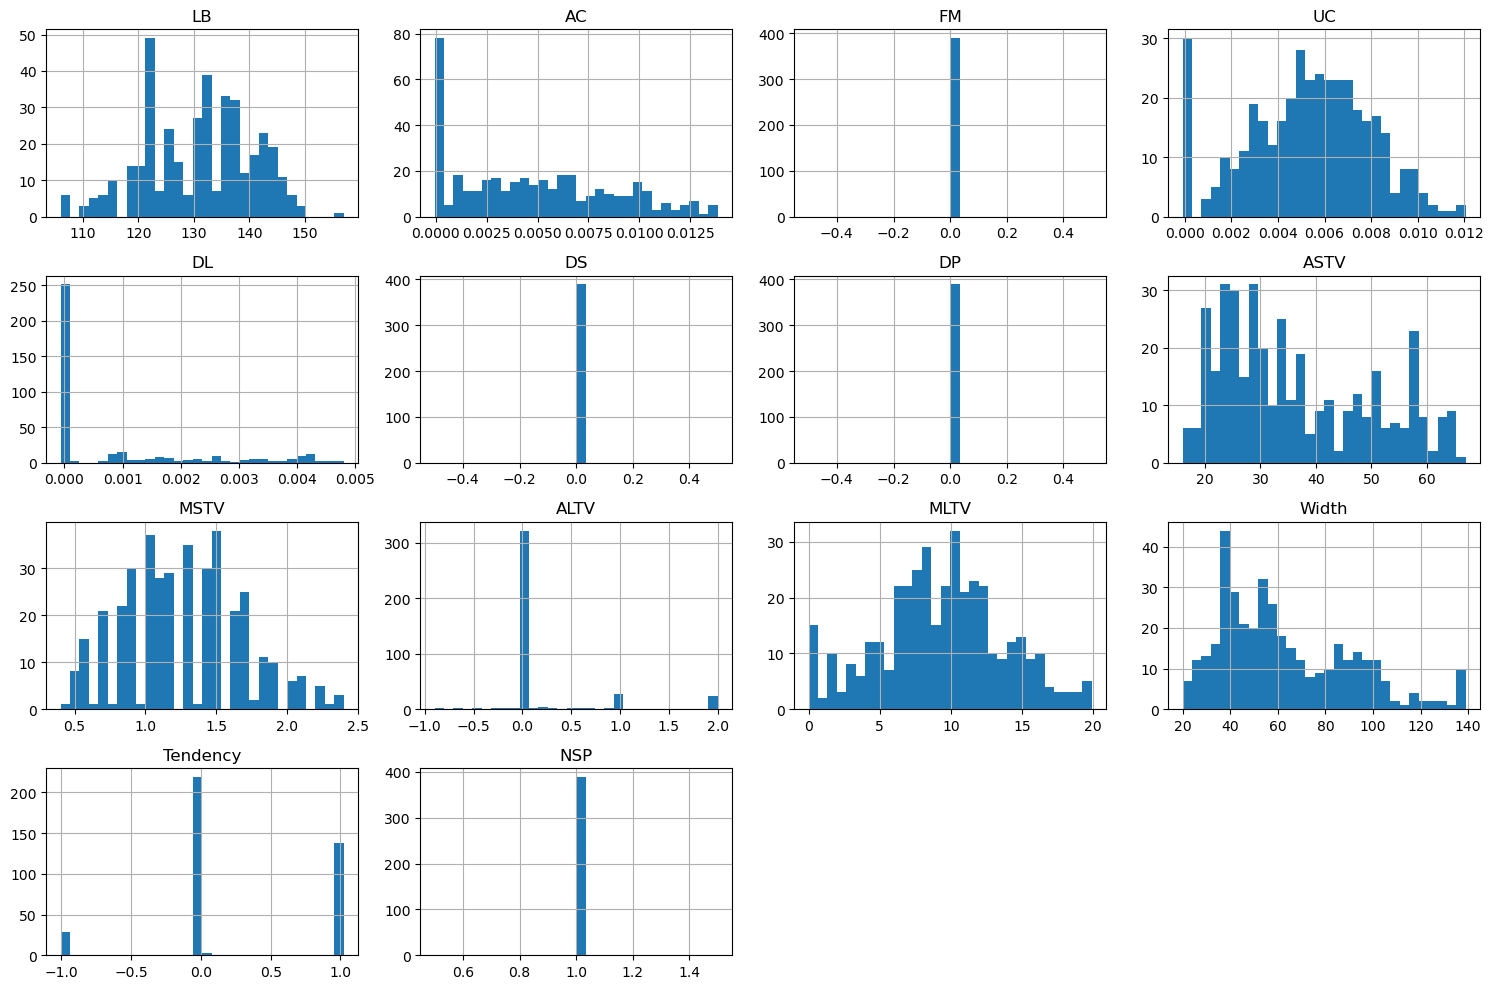

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


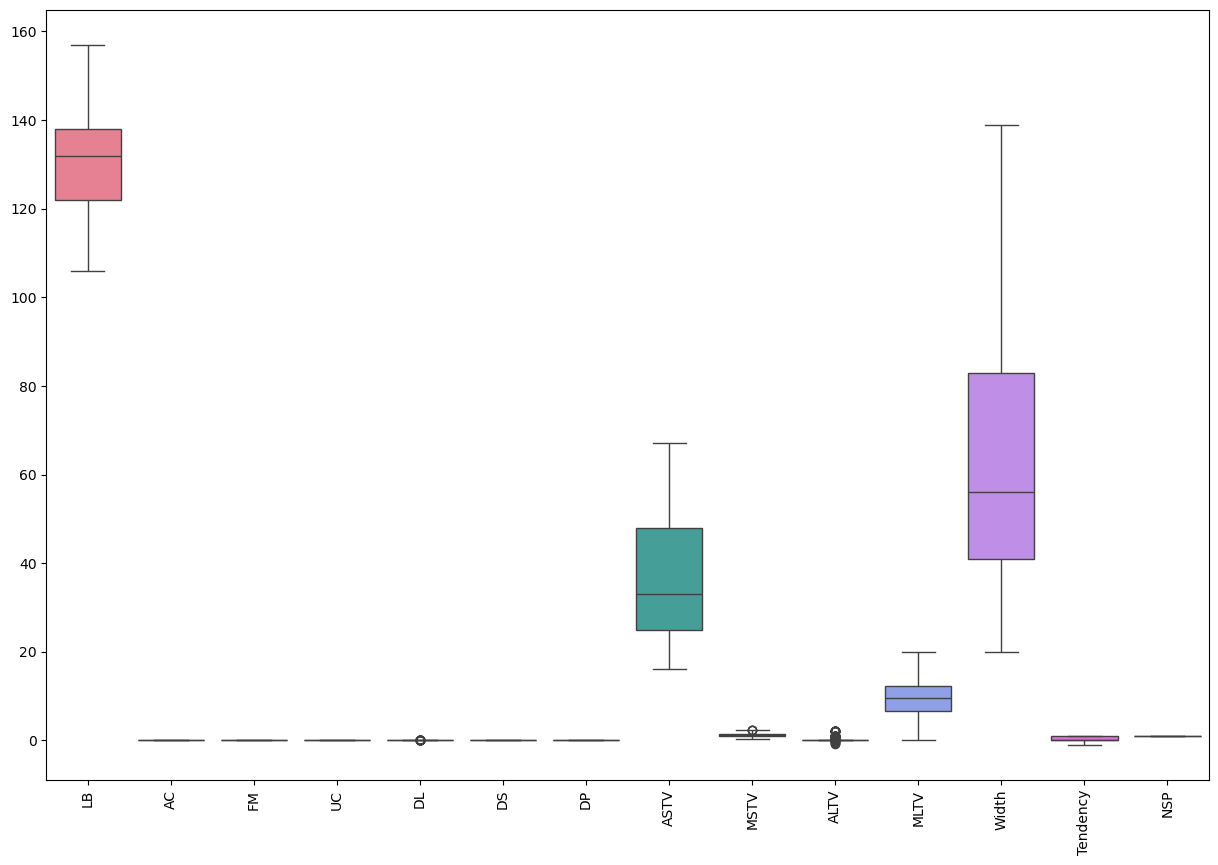

In [38]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

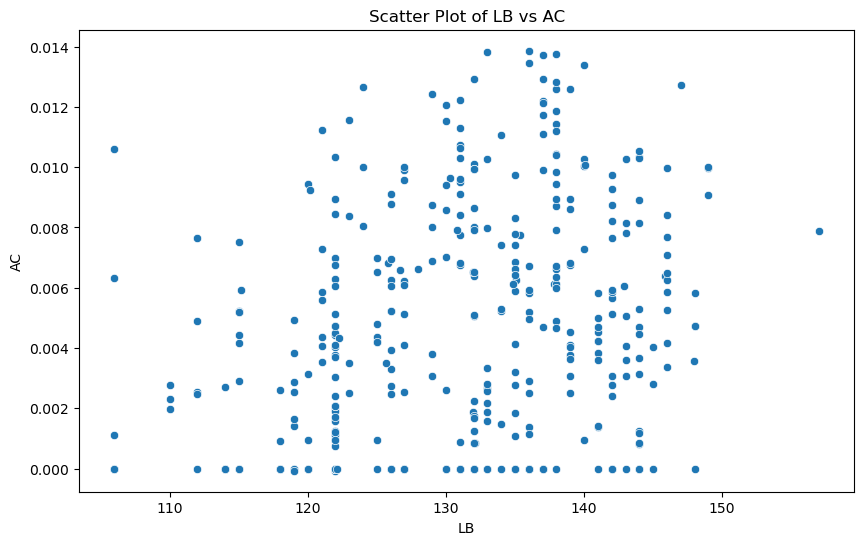

In [49]:
 # Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LB', y='AC')
plt.title('Scatter Plot of LB vs AC')
plt.show()


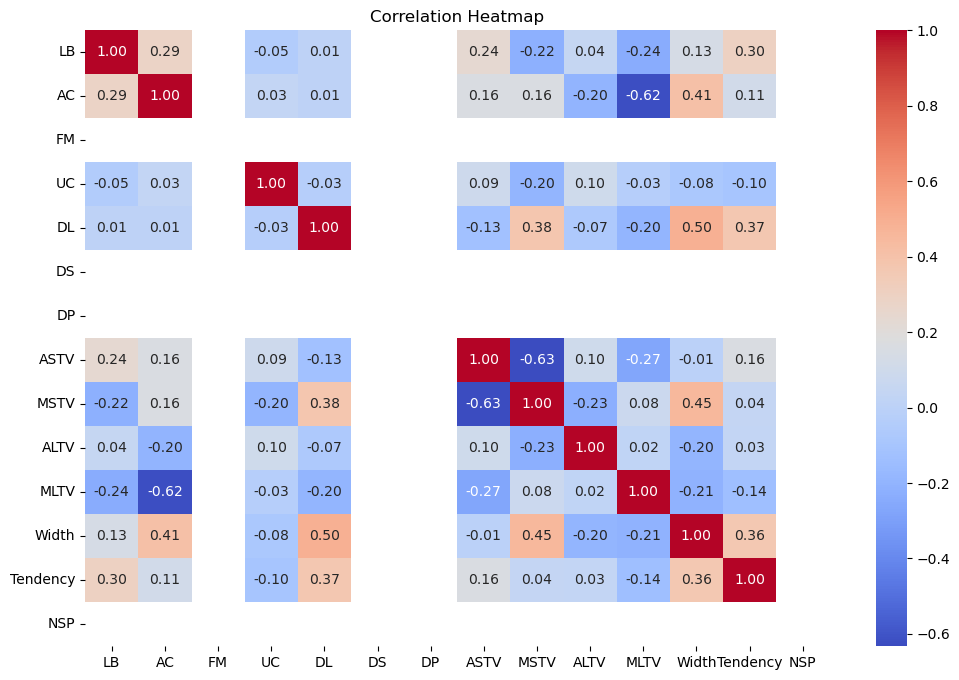

In [51]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Advanced Visualization Techniques

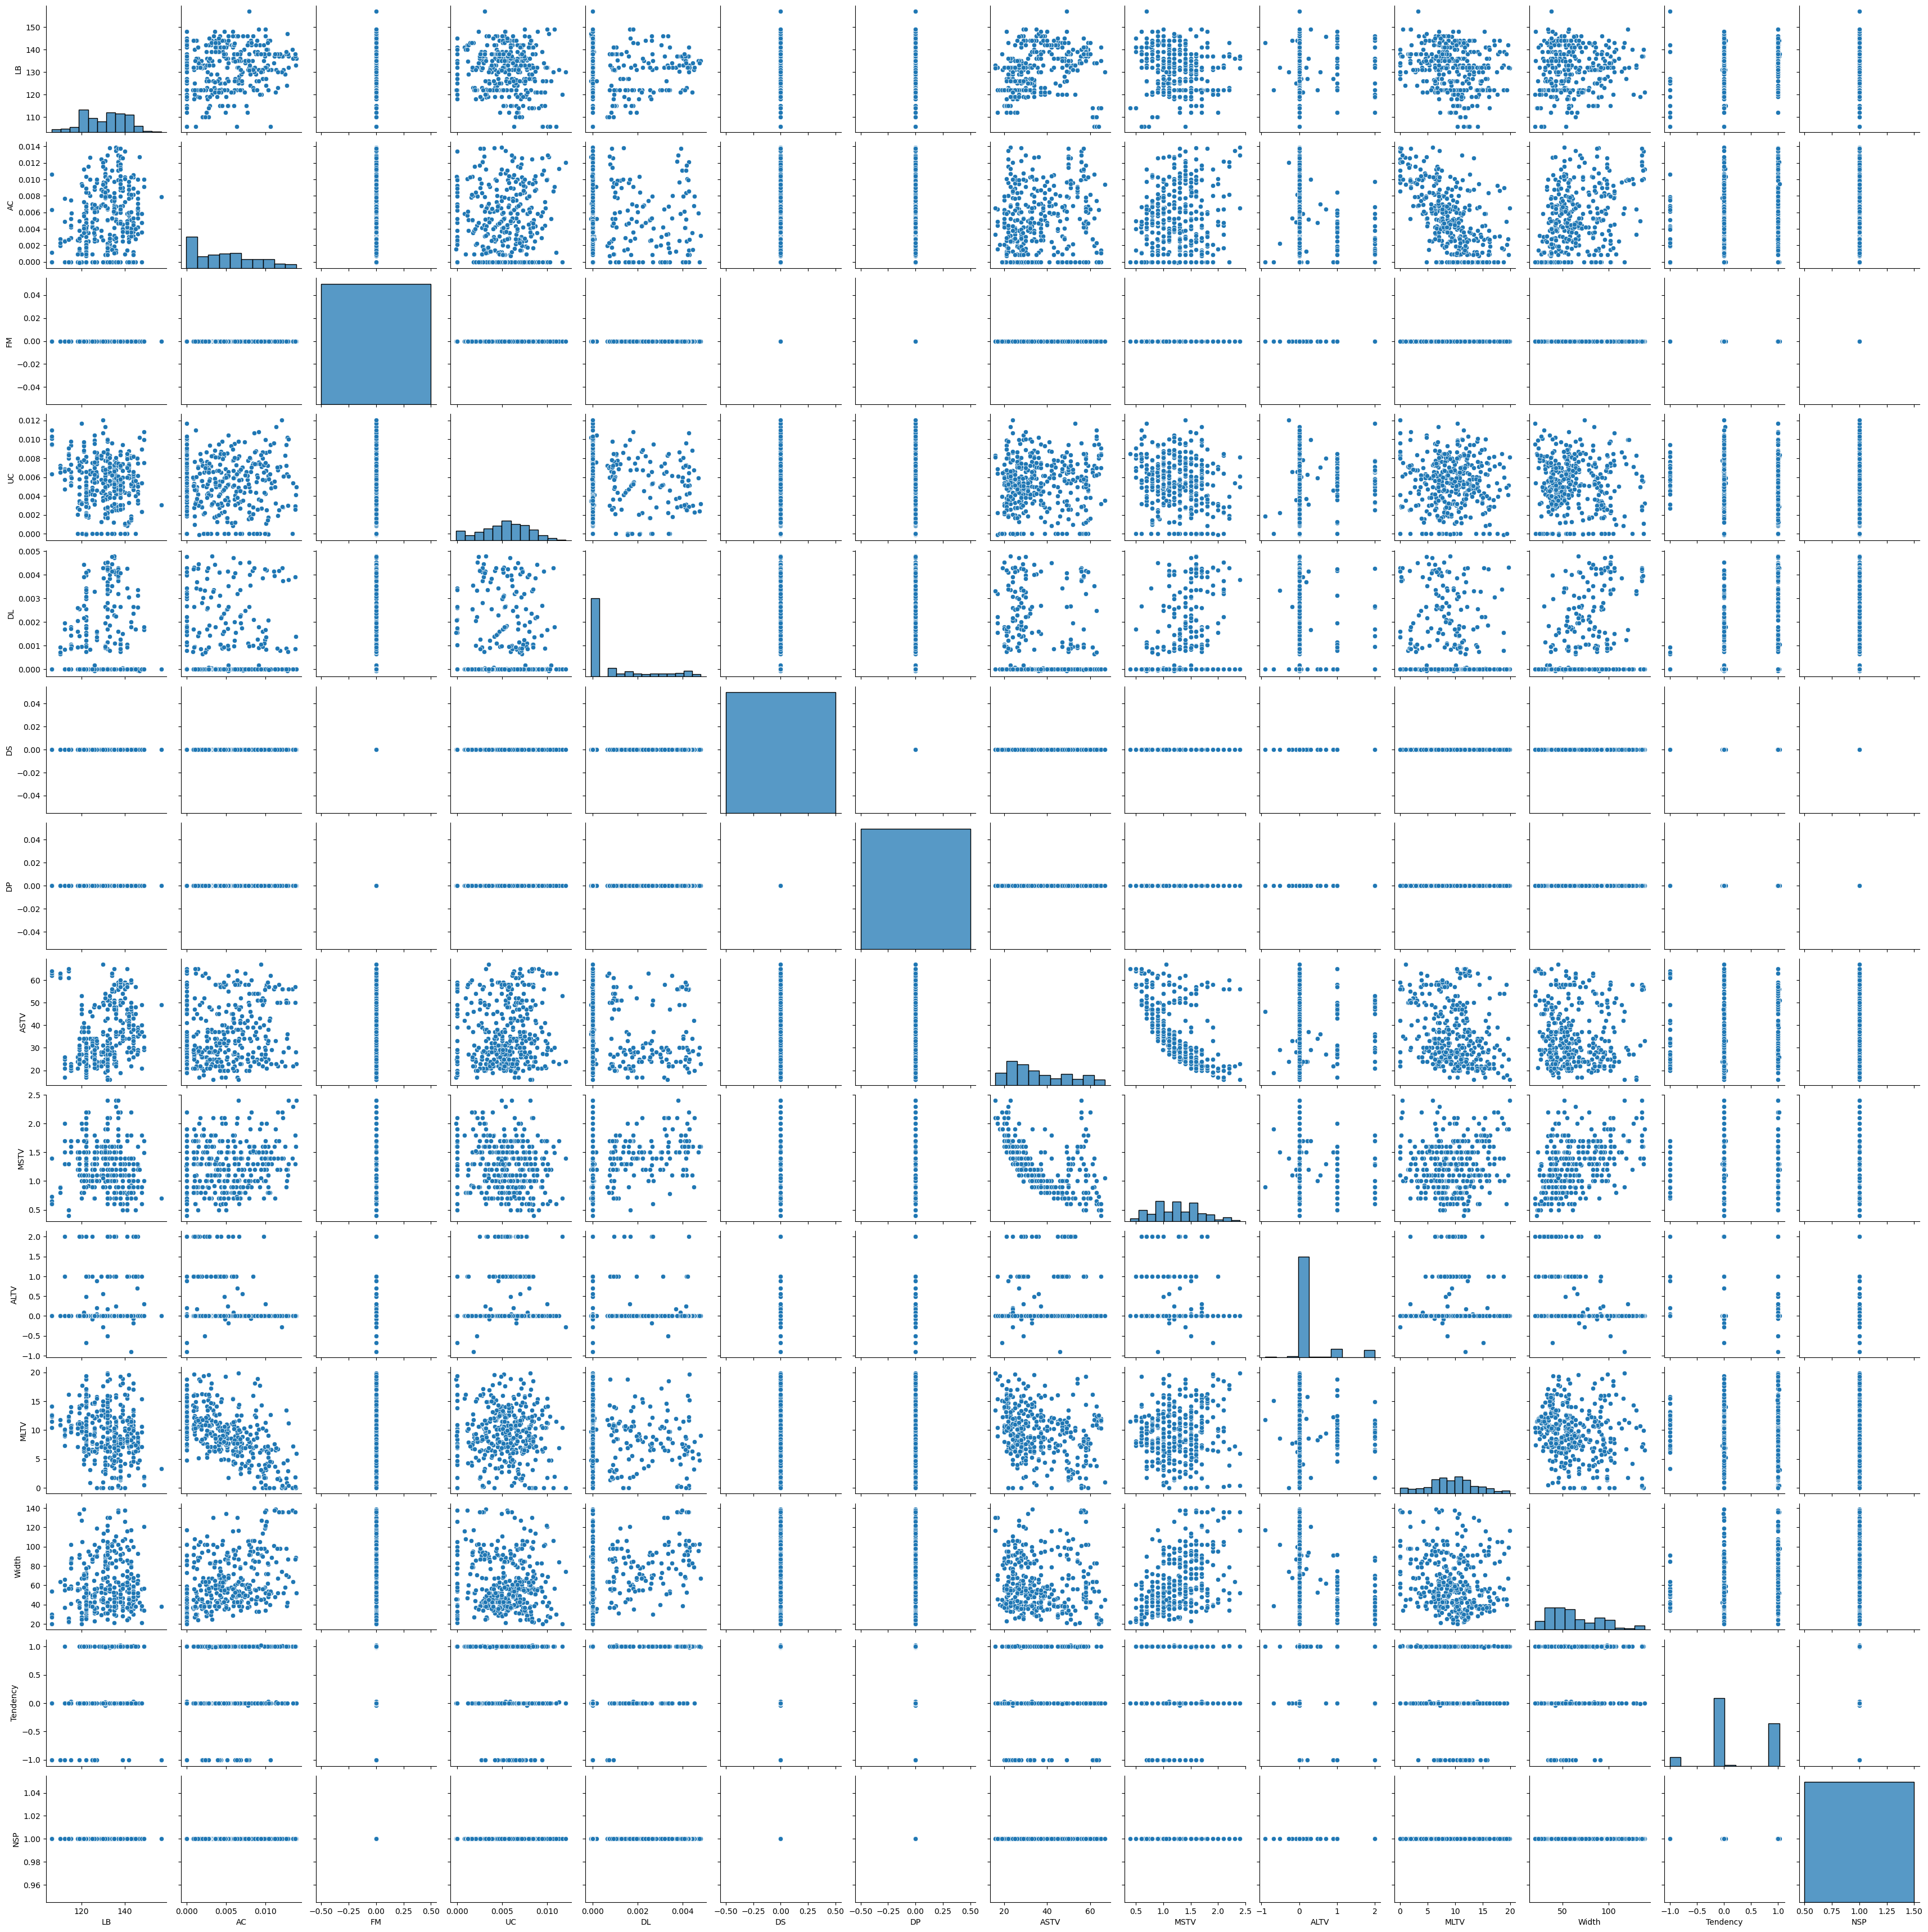

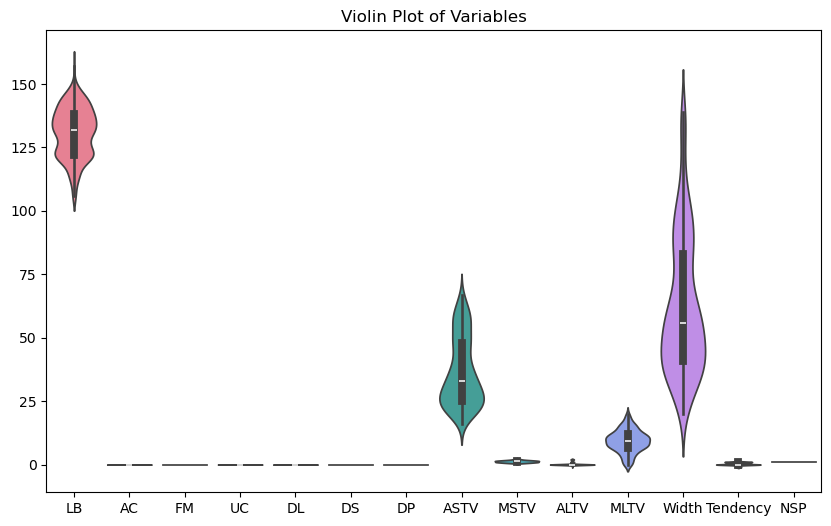

In [42]:
# Pair plot
sns.pairplot(df)
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of Variables')
plt.show()


#### 4. Pattern Recognition and Insights

In [43]:
correlation_matrix = df.corr()
print(correlation_matrix)


                LB        AC  FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.285247 NaN -0.050568  0.008502 NaN NaN  0.235979   
AC        0.285247  1.000000 NaN  0.032556  0.007918 NaN NaN  0.160402   
FM             NaN       NaN NaN       NaN       NaN NaN NaN       NaN   
UC       -0.050568  0.032556 NaN  1.000000 -0.028875 NaN NaN  0.088420   
DL        0.008502  0.007918 NaN -0.028875  1.000000 NaN NaN -0.126717   
DS             NaN       NaN NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.235979  0.160402 NaN  0.088420 -0.126717 NaN NaN  1.000000   
MSTV     -0.219532  0.161593 NaN -0.198476  0.375678 NaN NaN -0.632709   
ALTV      0.043351 -0.201443 NaN  0.098523 -0.069438 NaN NaN  0.097907   
MLTV     -0.239685 -0.624870 NaN -0.028021 -0.195343 NaN NaN -0.271156   
Width     0.133408  0.412669 NaN -0.081773  0.495659 NaN NaN -0.005428   
Tendency  0.298855  0.112584 NaN -0.10

The correlation matrix indicated that some features are positively correlated, while others show weak or no correlation.
Notably, LB is moderately correlated with Tendency, suggesting that as one variable increases, the other may also increase.

#### Recommendations for Further Analysis

1)Predictive Modeling: Utilize the cleaned dataset to build predictive models, potentially focusing on predicting NSP (the output variable).2)
Feature Engineering: Consider creating new features based on existing ones to enhance model performance.3)
Advanced Visualizations: Explore more advanced visualization techniques to uncover deeper insights, such as time series analysis if temporal data is available.

### Conclusion
The exploratory analysis of the Cardiotocographic dataset revealed several key insights: the dataset comprises 2126 entries across 14 features, with missing values in several columns, which were addressed by filling them with the mean. Outlier detection using the Interquartile Range (IQR) method identified and removed 101 outliers, resulting in a filtered dataset of 288 entries. The statistical summary indicated that LB has a mean of approximately 130.90 and a standard deviation of 9.75, while features like AC, DL, and MSTV showed lower variability compared to others. The correlation heatmap highlighted significant relationships, particularly a positive correlation between LB and Tendency (0.298) and between LB and AC (0.285), while some features, such as FM, exhibited no significant correlations. Visualizations, including histograms and scatter plots, illustrated the distributions of features and the relationships between variables. Overall, these insights suggest that certain features may influence the outcome variable NSP, providing a solid foundation for further modeling and analysis, particularly in predictive modeling efforts.